In [1]:
import pandas as pd
import seaborn as sns

import sys
sys.path.append('путь_до_папки/vulnerable_populations/additional_functions')
from functions import to_modify_dataframe, transform_to_changes

##### Прочитаем и преобразуем данные о среднемесячной номинальной начисленной заработной плате.

In [2]:
formal_wage_paid = pd.read_excel(io='../social_russia_data/cash_real_income_wages_2015_2020.xlsx', sheet_name=2, header=0, index_col=0)
formal_wage_paid = to_modify_dataframe(formal_wage_paid)
formal_wage_paid = formal_wage_paid.rename(lambda arg: f'Среднемесячная номинальная начисленная заработная плата в {arg} году, руб.', axis=1)
formal_wage_paid.head()

Число регионов России - 85.


,"Среднемесячная номинальная начисленная заработная плата в 2015 году, руб.","Среднемесячная номинальная начисленная заработная плата в 2016 году, руб.","Среднемесячная номинальная начисленная заработная плата в 2017 году, руб.","Среднемесячная номинальная начисленная заработная плата в 2018 году, руб.","Среднемесячная номинальная начисленная заработная плата в 2019 году, руб.","Среднемесячная номинальная начисленная заработная плата в 2020 году, руб."
Белгородская область,25456.0,27091.0,29066.0,31852.0,34615.0,37442.0
Брянская область,21679.0,22923.0,24743.0,27251.0,29853.0,31946.0
Владимирская область,23877.0,25135.0,26975.0,30460.0,33076.0,35240.0
Воронежская область,24906.0,26335.0,28007.0,31207.0,33690.0,36317.0
Ивановская область,21161.0,22144.0,23470.0,25729.0,27553.0,29083.0


##### Посмотрим корреляцию между признаками.

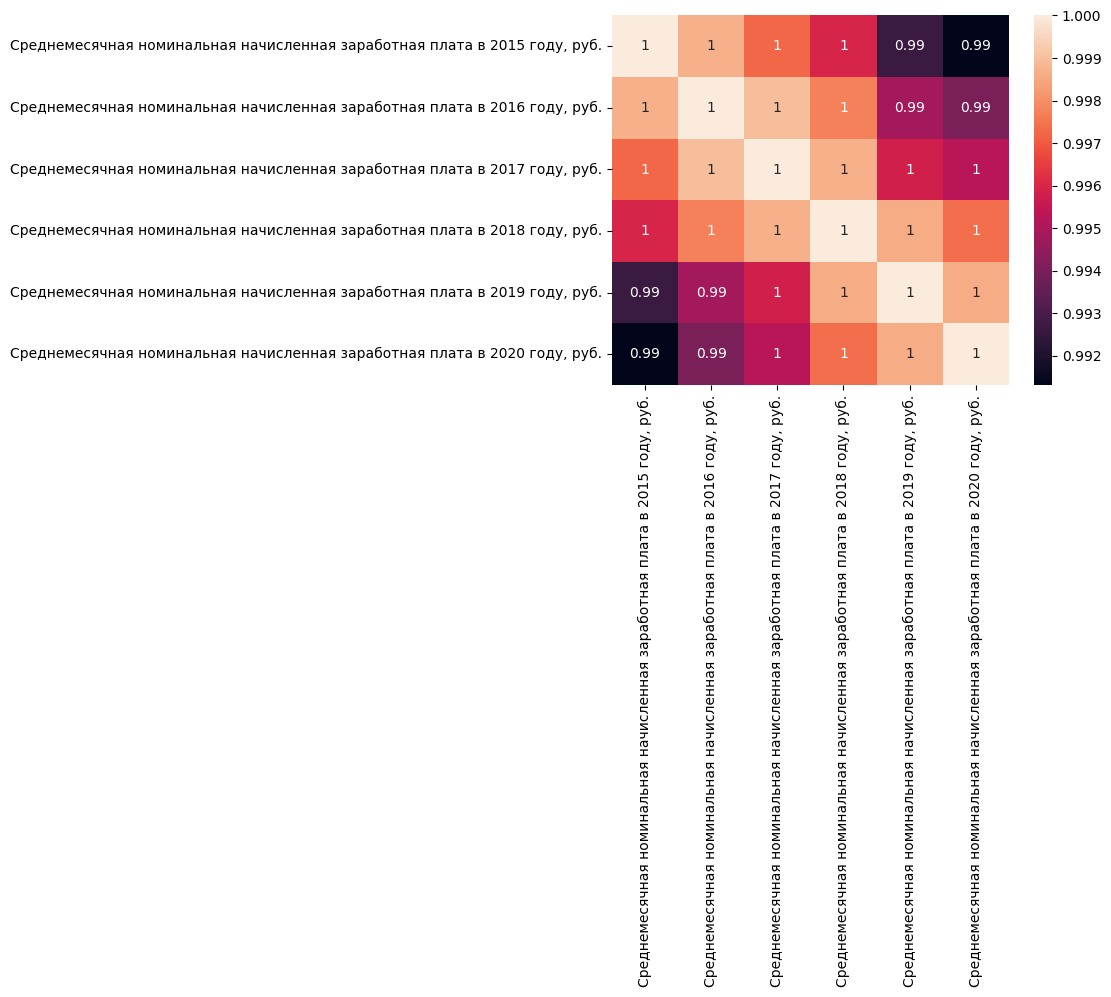

In [3]:
sns.heatmap(formal_wage_paid.corr(), annot=True);

##### Признаки сильно коррелированы. Поэтому вместо самой номинальной начисленной зарплаты попробуем рассмотреть их динамику.

In [4]:
formal_wage_paid_changes = transform_to_changes(formal_wage_paid)
formal_wage_paid_changes = formal_wage_paid_changes.rename(
    lambda arg: f"Динамика среднемесячной номинальной начисленной зарплаты в {arg.split(' ')[6]} г., руб.", axis=1
)
formal_wage_paid_changes.head()

,"Динамика среднемесячной номинальной начисленной зарплаты в 2016 г., руб.","Динамика среднемесячной номинальной начисленной зарплаты в 2017 г., руб.","Динамика среднемесячной номинальной начисленной зарплаты в 2018 г., руб.","Динамика среднемесячной номинальной начисленной зарплаты в 2019 г., руб.","Динамика среднемесячной номинальной начисленной зарплаты в 2020 г., руб."
Белгородская область,6.422847,7.290244,9.585082,8.674495,8.166980
Брянская область,5.738272,7.939624,10.136200,9.548273,7.011021
Владимирская область,5.268669,7.320469,12.919370,8.588313,6.542508
Воронежская область,5.737573,6.348965,11.425715,7.956548,7.797566
Ивановская область,4.645338,5.988078,9.625053,7.089277,5.552934


##### И как и в случае со среднемесячными денежными доходами (per_capita_cash_income.ipynb) оставим показатели среднемесячной номинальной начисленной заработной платы только за 2020 год.

In [5]:
formal_wage_paid = formal_wage_paid.drop(columns=[
    'Среднемесячная номинальная начисленная заработная плата в 2015 году, руб.',
    'Среднемесячная номинальная начисленная заработная плата в 2016 году, руб.',
    'Среднемесячная номинальная начисленная заработная плата в 2017 году, руб.',
    'Среднемесячная номинальная начисленная заработная плата в 2018 году, руб.',
    'Среднемесячная номинальная начисленная заработная плата в 2019 году, руб.'
])
formal_wage_paid.head()

,"Среднемесячная номинальная начисленная заработная плата в 2020 году, руб."
Белгородская область,37442.0
Брянская область,31946.0
Владимирская область,35240.0
Воронежская область,36317.0
Ивановская область,29083.0


##### Посмотрим корреляцию признаков, описывающих динамику.

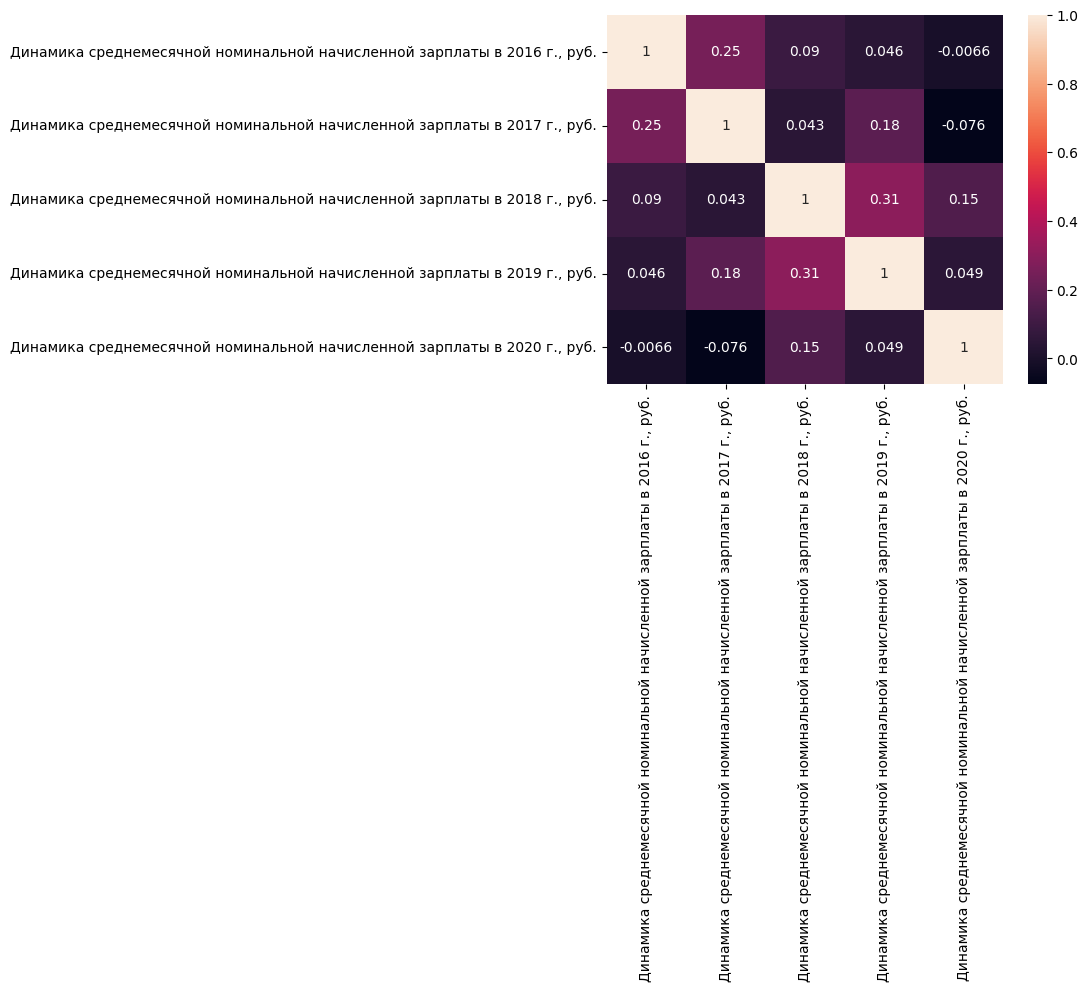

In [6]:
sns.heatmap(formal_wage_paid_changes.corr(), annot=True);

##### Получившиеся признаки практически не коррелируют либо коррелируют слабо.

In [7]:
formal_wage_paid.to_csv('../datasets_mod/formal_wage_paid.csv', sep=',')
formal_wage_paid_changes.to_csv('../datasets_mod/formal_wage_paid_changes.csv', sep=',')